# Tutorial #1 - Optiland for Beginners

### May 2024

This tutorial describes the basics of Optiland. In particular, the following topics are covered:
- Basic lens entry
- Material definition and selection
- Aperture, field and wavelength selection
- Drawing a lens in 2D and 3D

In [1]:
import numpy as np
from optiland import optic

In Optiland, lenses are instances of the "Optic" class. The process for defining a lens starts with creating an empty "Optic" object as follows:

In [2]:
lens = optic.Optic()

We now want to populate the lens object with surfaces. Let's first add the object surface, which will be at infinity and will have a radius of infinity, i.e. it is a plane. We add the surface by calling the "add_surface" method. We must specify the index as 0 to indicate this is the first surface.

In [3]:
lens.add_surface(index=0, radius=np.inf, thickness=np.inf)

Let's now add a singlet lens. The lens will be defined as follows:
- Material: N-SF11
- Thickness: 7 mm
- Radius side 1: 20 mm
- Radius side 2: -50 mm
- Stop surface: 1

Optiland defines lenses one surface at a time, so we define each side of the lens separately. The material always corresponds to the material after interaction with a surface (refraction or reflection). Likewise, the thickness corresponds to the thickness after the surface and it is positive for surfaces to the right. This also implies that we must define the distance from the second surface to the next surface, which we'll define as 18 mm.

Note that we specify the indices of the two surfaces as 1 and 2, after we already specified the object plane with index 0. Also note that Optiland uses millimeters by default.

In [4]:
lens.add_surface(index=1, thickness=7, radius=20, is_stop=True, material='N-SF11')
lens.add_surface(index=2, radius=np.inf, thickness=18)

Lastly, let's add the image plane. By default, the radius is infinity, so we can exclude it. We also can omit thickness, as there are no surfaces beyond the image. We need only to define the index, which is 3.

In [5]:
lens.add_surface(index=3)

Now, we can define the aperture of the system. Let's choose entrance pupil diameter (EPD) as the aperture type with a value of 25 mm.

The options for aperture type are:
- 'EPD' - entrance pupil diameter
- 'imageFNO' - image-space F-number
- 'objectNA' - object-space numerical aperture

In [6]:
# add aperture
lens.set_aperture(aperture_type='EPD', value=25.4)

Let's add the fields of the lens. We'll keep it simple and add a single field of type "angle" with a value of 0.

The options for field types are:
- 'angle' - the angle of the field in object space
- 'object_height' - the height of the object

In [7]:
# add field
lens.set_field_type(field_type='angle')
lens.add_field(y=0)

Lastly, let's define the wavelengths of the system. We define a single wavelength at 0.5 µm.

In [8]:
# add wavelength
lens.add_wavelength(value=0.5, is_primary=True)

It is good practice to call "update_paraxial" to update the apertures of the system. Let's do so:

In [9]:
lens.update_paraxial()

Let's view the lens in 2D. We can do this by calling the "draw" method.

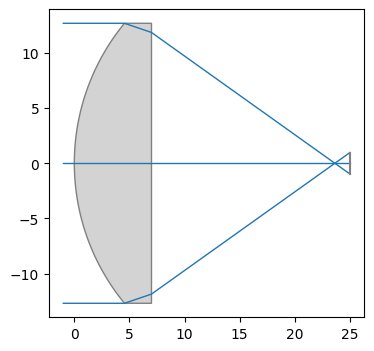

In [10]:
lens.draw()

Finally, we view the lens in 3D using the "draw3D" function. Note that this opens a new window.

In [11]:
lens.draw3D()